# Churn_Modelling
#### Reference: https://www.kaggle.com/aakash50897/churn-modellingcsv

In [1]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values
dataset[0:10]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


## Data Preprocessing

In [2]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:] # Avoiding dummy variable trap!

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\Hong\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Hong\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


## Making the ANN

In [3]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

def build_classifier():
    # Initializing the ANN
    classifier = Sequential()

    # Adding the input layer and the first hidden layer with dropout
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    # classifier.add(Dropout(rate = 0.2))

    # Adding the second hidden layer with dropout
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    # classifier.add(Dropout(rate = 0.2))

    # Adding the output layer
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

    # Compiling the ANN
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

Using TensorFlow backend.


In [4]:
classifier = build_classifier()
classifier.summary()

W1111 22:37:01.977340  5168 deprecation_wrapper.py:119] From C:\Users\Hong\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1111 22:37:02.007261  5168 deprecation_wrapper.py:119] From C:\Users\Hong\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1111 22:37:02.012248  5168 deprecation_wrapper.py:119] From C:\Users\Hong\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1111 22:37:02.118961  5168 deprecation_wrapper.py:119] From C:\Users\Hong\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1111 22:37:02.149189  5168 deprecation_wrapper.py:119] From C:\Users\Hong\Anaconda3

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Fitting ANN to the Training set
h = classifier.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 25, epochs = 300, verbose = 1)

W1111 22:37:05.715898  5168 deprecation_wrapper.py:119] From C:\Users\Hong\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 8000 samples, validate on 2000 samples
Epoch 1/300
8000/8000 [==============================] - 1s 120us/step - loss: 0.5704 - acc: 0.7936 - val_loss: 0.4371 - val_acc: 0.7975
Epoch 2/300
8000/8000 [==============================] - 0s 53us/step - loss: 0.4285 - acc: 0.7960 - val_loss: 0.4205 - val_acc: 0.7975
Epoch 3/300
8000/8000 [==============================] - 0s 57us/step - loss: 0.4190 - acc: 0.7960 - val_loss: 0.4144 - val_acc: 0.7975
Epoch 4/300
8000/8000 [==============================] - 0s 43us/step - loss: 0.4128 - acc: 0.7960 - val_loss: 0.4093 - val_acc: 0.7975
Epoch 5/300
8000/8000 [==============================] - 0s 43us/step - loss: 0.4069 - acc: 0.7960 - val_loss: 0.4031 - val_acc: 0.7975
Epoch 6/300
8000/8000 [==============================] - 0s 43us/step - loss: 0.4001 - acc: 0.8101 - val_loss: 0.3970 - val_acc: 0.8350
Epoch 7/300
8000/8000 [==============================] - 0s 43us/step - loss: 0.3947 - acc: 0.8280 - val_loss: 0.3909 - val_acc: 0.8340

8000/8000 [==============================] - 0s 43us/step - loss: 0.3462 - acc: 0.8589 - val_loss: 0.3423 - val_acc: 0.8590
Epoch 61/300
8000/8000 [==============================] - 0s 43us/step - loss: 0.3461 - acc: 0.8595 - val_loss: 0.3414 - val_acc: 0.8545
Epoch 62/300
8000/8000 [==============================] - 1s 67us/step - loss: 0.3463 - acc: 0.8607 - val_loss: 0.3410 - val_acc: 0.8545
Epoch 63/300
8000/8000 [==============================] - 0s 42us/step - loss: 0.3458 - acc: 0.8597 - val_loss: 0.3402 - val_acc: 0.8535
Epoch 64/300
8000/8000 [==============================] - 0s 42us/step - loss: 0.3458 - acc: 0.8580 - val_loss: 0.3431 - val_acc: 0.8595
Epoch 65/300
8000/8000 [==============================] - 0s 43us/step - loss: 0.3465 - acc: 0.8587 - val_loss: 0.3423 - val_acc: 0.8535
Epoch 66/300
8000/8000 [==============================] - 0s 42us/step - loss: 0.3457 - acc: 0.8609 - val_loss: 0.3426 - val_acc: 0.8545
Epoch 67/300
8000/8000 [==============================

Epoch 120/300
8000/8000 [==============================] - 0s 43us/step - loss: 0.3404 - acc: 0.8626 - val_loss: 0.3380 - val_acc: 0.8575
Epoch 121/300
8000/8000 [==============================] - 0s 43us/step - loss: 0.3390 - acc: 0.8639 - val_loss: 0.3371 - val_acc: 0.8635
Epoch 122/300
8000/8000 [==============================] - 0s 44us/step - loss: 0.3389 - acc: 0.8612 - val_loss: 0.3405 - val_acc: 0.8600
Epoch 123/300
8000/8000 [==============================] - 0s 43us/step - loss: 0.3400 - acc: 0.8619 - val_loss: 0.3396 - val_acc: 0.8550
Epoch 124/300
8000/8000 [==============================] - 0s 43us/step - loss: 0.3402 - acc: 0.8621 - val_loss: 0.3402 - val_acc: 0.8555
Epoch 125/300
8000/8000 [==============================] - 0s 45us/step - loss: 0.3399 - acc: 0.8620 - val_loss: 0.3383 - val_acc: 0.8565
Epoch 126/300
8000/8000 [==============================] - 0s 44us/step - loss: 0.3398 - acc: 0.8609 - val_loss: 0.3373 - val_acc: 0.8580
Epoch 127/300
8000/8000 [=========

8000/8000 [==============================] - 0s 43us/step - loss: 0.3380 - acc: 0.8612 - val_loss: 0.3391 - val_acc: 0.8575
Epoch 180/300
8000/8000 [==============================] - 0s 43us/step - loss: 0.3374 - acc: 0.8612 - val_loss: 0.3426 - val_acc: 0.8530
Epoch 181/300
8000/8000 [==============================] - 0s 42us/step - loss: 0.3378 - acc: 0.8634 - val_loss: 0.3399 - val_acc: 0.8590
Epoch 182/300
8000/8000 [==============================] - 0s 42us/step - loss: 0.3382 - acc: 0.8626 - val_loss: 0.3410 - val_acc: 0.8555
Epoch 183/300
8000/8000 [==============================] - 0s 42us/step - loss: 0.3379 - acc: 0.8612 - val_loss: 0.3393 - val_acc: 0.8560
Epoch 184/300
8000/8000 [==============================] - 0s 42us/step - loss: 0.3378 - acc: 0.8616 - val_loss: 0.3403 - val_acc: 0.8555
Epoch 185/300
8000/8000 [==============================] - 0s 43us/step - loss: 0.3377 - acc: 0.8622 - val_loss: 0.3388 - val_acc: 0.8620
Epoch 186/300
8000/8000 [=======================

8000/8000 [==============================] - 0s 44us/step - loss: 0.3372 - acc: 0.8642 - val_loss: 0.3386 - val_acc: 0.8575
Epoch 239/300
8000/8000 [==============================] - 0s 44us/step - loss: 0.3371 - acc: 0.8627 - val_loss: 0.3381 - val_acc: 0.8595
Epoch 240/300
8000/8000 [==============================] - 0s 46us/step - loss: 0.3372 - acc: 0.8631 - val_loss: 0.3382 - val_acc: 0.8565
Epoch 241/300
8000/8000 [==============================] - 0s 46us/step - loss: 0.3371 - acc: 0.8640 - val_loss: 0.3387 - val_acc: 0.8615
Epoch 242/300
8000/8000 [==============================] - 0s 44us/step - loss: 0.3373 - acc: 0.8631 - val_loss: 0.3418 - val_acc: 0.8545
Epoch 243/300
8000/8000 [==============================] - 0s 45us/step - loss: 0.3375 - acc: 0.8615 - val_loss: 0.3394 - val_acc: 0.8585
Epoch 244/300
8000/8000 [==============================] - 0s 44us/step - loss: 0.3371 - acc: 0.8629 - val_loss: 0.3399 - val_acc: 0.8555
Epoch 245/300
8000/8000 [=======================

8000/8000 [==============================] - 1s 64us/step - loss: 0.3372 - acc: 0.8610 - val_loss: 0.3382 - val_acc: 0.8580
Epoch 298/300
8000/8000 [==============================] - 1s 64us/step - loss: 0.3369 - acc: 0.8626 - val_loss: 0.3415 - val_acc: 0.8565
Epoch 299/300
8000/8000 [==============================] - 1s 70us/step - loss: 0.3370 - acc: 0.8631 - val_loss: 0.3396 - val_acc: 0.8555
Epoch 300/300
8000/8000 [==============================] - 1s 74us/step - loss: 0.3366 - acc: 0.8626 - val_loss: 0.3412 - val_acc: 0.8560


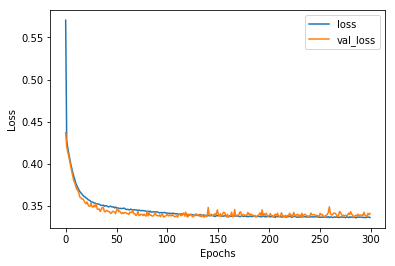

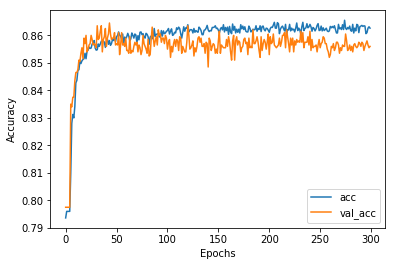

In [6]:
# Plotting the loss
plt.figure(1)
plt.plot(h.history['loss'], label = 'loss')
plt.plot(h.history['val_loss'], label = 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the acc
plt.figure(2)
plt.plot(h.history['acc'], label = 'acc')
plt.plot(h.history['val_acc'], label = 'val_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Making the Confusion Matrix

In [7]:
from sklearn.metrics import confusion_matrix 
def Classification(clf, X, y):
    X_set, y_set = X, y
    y_hat = clf.predict(X_set)
    y_hat = np.reshape(y_hat, -1)
    y_hat[y_hat >= 0.5] = 1
    y_hat[y_hat < 0.5] = 0
    cm = confusion_matrix(y_set, y_hat)    
    TN = cm[0, 0]
    FN = cm[1, 0]
    TP = cm[1, 1]
    FP = cm[0, 1]    
    accuracy = (TP + TN)/(TN + FN + TP + FP)
    PPV = TP/(TP + FP) # Positive Predictive Value, Precision 
    TPR = TP/(TP + FN) # Sensitivitive, Recall    
    TNR = TN/(TN + FP) # Specificitive
    NPV = TN/(TN + FP) # Negative Predictive Value    
    F1_score = 2/(1/PPV + 1/TPR)
    summary = {'Accuracy': accuracy, 
               'Positive_Predictive_Value': PPV, 
               'Negative_Predictive_Value': NPV,            
               'Sensitivitive': TPR, 
               'Specificitive': TNR,            
               'F1_score': F1_score, 
               'CM': cm}
    return summary

### Training Set

In [8]:
Classification(clf = classifier, X = X_train, y = y_train)

{'Accuracy': 0.865,
 'Positive_Predictive_Value': 0.7593984962406015,
 'Negative_Predictive_Value': 0.9597989949748744,
 'Sensitivitive': 0.4950980392156863,
 'Specificitive': 0.9597989949748744,
 'F1_score': 0.5994065281899109,
 'CM': array([[6112,  256],
        [ 824,  808]], dtype=int64)}

### Test Set

In [9]:
Classification(clf = classifier, X = X_test, y = y_test)

{'Accuracy': 0.856,
 'Positive_Predictive_Value': 0.6956521739130435,
 'Negative_Predictive_Value': 0.9429467084639498,
 'Sensitivitive': 0.5135802469135803,
 'Specificitive': 0.9429467084639498,
 'F1_score': 0.5909090909090909,
 'CM': array([[1504,   91],
        [ 197,  208]], dtype=int64)}

## Evaluating the ANN

In [10]:
# Applying k-fold Cross Validation
from sklearn.model_selection import cross_val_score
def cv_score(clf, X, y, cv):
    accuracies = cross_val_score(estimator = clf, X = X, y = y, cv = cv)
    plt.plot(accuracies, '-o')
    plt.axhline(accuracies.mean(), color = 'black', ls = '-')
    plt.axhline(accuracies.mean() + 2 * accuracies.std(), color = 'black', ls = '--')
    plt.axhline(accuracies.mean() - 2 * accuracies.std(), color = 'black', ls = '--')
    plt.xlabel('CV')
    plt.ylabel('Accuracy')
    plt.title('Classifier: ' + clf.__class__.__name__)
    plt.show()
    return [accuracies.mean(), accuracies.std()]

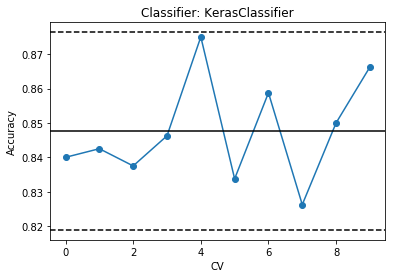

ANN: CV score = 0.848 (+/- 0.029); Test set accuracy = 0.840


In [11]:
from keras.wrappers.scikit_learn import KerasClassifier
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 25, epochs = 300, verbose = 0)
ANN_score = cv_score(clf = classifier, X = X_train, y = y_train, cv = 10)
classifier.fit(X_train, y_train)
ANN_score.append(classifier.score(X_test, y_test))
print('ANN: CV score = %0.3f (+/- %0.3f); Test set accuracy = %0.3f' % (ANN_score[0], 2 * ANN_score[1], ANN_score[2]))

## Evaluating, Improving and Tuning the ANN

In [ ]:
# Improving the ANN
# Dropout Regularization to reduce overfitting if needed
# Tuning the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [25, 50], 
              'epochs': [300], 
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier, 
                           param_grid = parameters, 
                           scoring = 'accuracy',
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 0)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_
results = grid_search.cv_results_

In [ ]:
best_parameters